# Librarys and Dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score,classification_report
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

# Dataset Load
Using pandas, load dataset for processing.

In [2]:
data_org=pd.read_csv('data_csv.csv')

In [3]:
data_clean = data_org.copy(deep=True)

# Data Analysis
Let's have a look in some rows of the dataset...

In [4]:
data_clean.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,17,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_clean.shape

(858, 36)

In [6]:
data_clean = data_clean.convert_objects(convert_numeric=True)

In [7]:
data_clean.Biopsy.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [8]:
data_clean.Hinselmann.value_counts()

0    823
1     35
Name: Hinselmann, dtype: int64

In [9]:
data_clean.Citology.value_counts()

0    814
1     44
Name: Citology, dtype: int64

In [10]:
data_clean.Schiller.value_counts()

0    784
1     74
Name: Schiller, dtype: int64

In [11]:
cancer_df=data_clean.copy(deep=True)

In [12]:
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,17,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0


# Smote Application

# Since smote works on one target variable at a time we have to do each time for each target variable

In [13]:
x = cancer_df.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis=1)

# Hinselmann

In [14]:
y_hin = cancer_df['Hinselmann']

* Finally, the base is separated into training and testing for creation and evaluation of the model.

In [15]:
xtrain_hin, xtest_hin, ytrain_hin, ytest_hin = train_test_split(x, y_hin, test_size=0.3, random_state=11)

In [16]:
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=0,k_neighbors=1,kind='svm',ratio=1,svm_estimator=SVC(kernel='linear'))
xtrain_hin, ytrain_hin = ros.fit_resample(xtrain_hin, ytrain_hin)

In [17]:
xtrain_hin = pd.DataFrame(xtrain_hin, columns=x.columns)
ytrain_hin = pd.DataFrame(ytrain_hin, columns=['Hinselmann'])
ytrain_hin.Hinselmann.value_counts()

0    574
1    353
Name: Hinselmann, dtype: int64

# Biopsy

In [18]:
y_bio=cancer_df.Biopsy

In [19]:
xtrain_bio, xtest_bio, ytrain_bio, ytest_bio = train_test_split(x, y_bio, test_size=0.3, random_state=11)

In [20]:
ros = SMOTE(random_state=0,k_neighbors=1,kind='svm',ratio=1,svm_estimator=SVC(kernel='linear'))
xtrain_bio, ytrain_bio = ros.fit_resample(xtrain_bio, ytrain_bio)

In [21]:
xtrain_bio = pd.DataFrame(xtrain_bio, columns=x.columns)
ytrain_bio = pd.DataFrame(ytrain_bio, columns=['Biopsy'])
ytrain_bio.Biopsy.value_counts()

0    557
1    350
Name: Biopsy, dtype: int64

# Citology

In [22]:
y_cit=cancer_df.Citology

In [23]:
xtrain_cit, xtest_cit, ytrain_cit, ytest_cit = train_test_split(x, y_cit, test_size=0.3, random_state=11)

In [24]:
ros = SMOTE(random_state=0,k_neighbors=1,kind='svm',ratio=1,svm_estimator=SVC(kernel='linear'))
xtrain_cit, ytrain_cit = ros.fit_resample(xtrain_cit, ytrain_cit)

In [25]:
xtrain_cit = pd.DataFrame(xtrain_cit, columns=x.columns)
ytrain_cit = pd.DataFrame(ytrain_cit, columns=['Citology'])
ytrain_cit.Citology.value_counts()

0    573
1    353
Name: Citology, dtype: int64

# Schiller

In [26]:
y_sch=cancer_df.Schiller

In [27]:
xtrain_sch, xtest_sch, ytrain_sch, ytest_sch = train_test_split(x, y_sch, test_size=0.3, random_state=11)

In [28]:
ros = SMOTE(random_state=0,k_neighbors=1,kind='svm',ratio=1,svm_estimator=SVC(kernel='linear'))
xtrain_sch, ytrain_sch = ros.fit_resample(xtrain_sch, ytrain_sch)

In [29]:
xtrain_sch = pd.DataFrame(xtrain_sch, columns=x.columns)
ytrain_sch = pd.DataFrame(ytrain_sch, columns=['Schiller'])
ytrain_sch.Schiller.value_counts()

0    543
1    347
Name: Schiller, dtype: int64

# Logistic Regression

# Hinselmann

In [30]:
clf_hin = LogisticRegression()
clf_hin.fit(xtrain_hin,ytrain_hin)
THRESHOLD = 0.35
pred_lr_hin = np.where((clf_hin.predict_proba(xtest_hin)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_hin, pred_lr_hin)*100, recall_score(ytest_hin, pred_lr_hin)*100,
                   precision_score(ytest_hin, pred_lr_hin)*100, roc_auc_score(ytest_hin, pred_lr_hin)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,70.155039
recall,22.222222
precision,2.777778
roc_auc_score,47.054886


In [31]:
print(classification_report(ytest_hin, pred_lr_hin))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       249
           1       0.03      0.22      0.05         9

   micro avg       0.70      0.70      0.70       258
   macro avg       0.50      0.47      0.44       258
weighted avg       0.93      0.70      0.80       258



In [32]:
confusion_matrix(ytest_hin, pred_lr_hin)

array([[179,  70],
       [  7,   2]], dtype=int64)

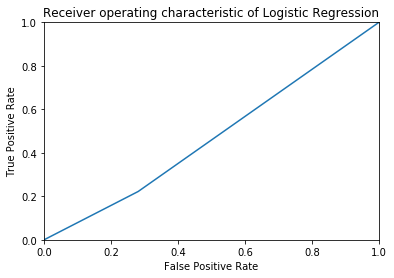

The AUC value for Logistic Regression(SMOTE) is: 0.47054886211512725


In [33]:
fpr, tpr, thresholds = roc_curve(ytest_hin, pred_lr_hin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression(SMOTE) is:',roc_auc)

Changing Threshold

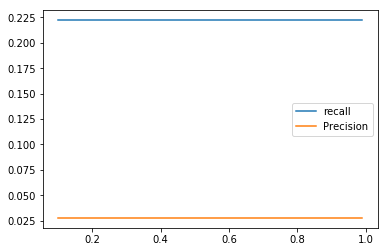

In [34]:
threshold=[]
recall=[]
precision=[]
for t in np.arange(0.1,1,0.01):
    threshold.append(t)
    pred_lr_sch=np.where(clf_hin.predict_proba(xtest_hin)[:,1] > t, 1, 0)
    recall.append(recall_score(ytest_hin, pred_lr_hin))
    precision.append(precision_score(ytest_hin, pred_lr_hin))  
    
plt.plot(threshold,recall,label='recall')
plt.plot(threshold,precision,label='Precision')
plt.legend(loc='best')

In [35]:
clf_hin = LogisticRegression()
clf_hin.fit(xtrain_hin,ytrain_hin)
THRESHOLD = 0.38
pred_lr_hin = np.where((clf_hin.predict_proba(xtest_hin)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_hin, pred_lr_hin)*100, recall_score(ytest_hin, pred_lr_hin)*100,
                   precision_score(ytest_hin, pred_lr_hin)*100, roc_auc_score(ytest_hin, pred_lr_hin)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,71.317829
recall,22.222222
precision,2.898551
roc_auc_score,47.657296


# Biopsy

In [36]:
clf_bio = LogisticRegression()
clf_bio.fit(xtrain_bio,ytrain_bio)
THRESHOLD = 0.35
pred_lr_bio = np.where((clf_bio.predict_proba(xtest_bio)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_bio, pred_lr_bio)*100, recall_score(ytest_bio, pred_lr_bio)*100,
                   precision_score(ytest_bio, pred_lr_bio)*100, roc_auc_score(ytest_bio, pred_lr_bio)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,70.930233
recall,33.333333
precision,5.633803
roc_auc_score,53.048780


In [37]:
print(classification_report(ytest_bio, pred_lr_bio))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       246
           1       0.06      0.33      0.10        12

   micro avg       0.71      0.71      0.71       258
   macro avg       0.51      0.53      0.46       258
weighted avg       0.92      0.71      0.79       258



In [38]:
confusion_matrix(ytest_bio, pred_lr_bio)

array([[179,  67],
       [  8,   4]], dtype=int64)

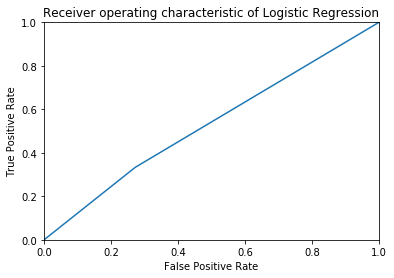

The AUC value for Logistic Regression(SMOTE) is: 0.5304878048780488


In [39]:
fpr, tpr, thresholds = roc_curve(ytest_bio, pred_lr_bio)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression(SMOTE) is:',roc_auc)

Changing Threshold

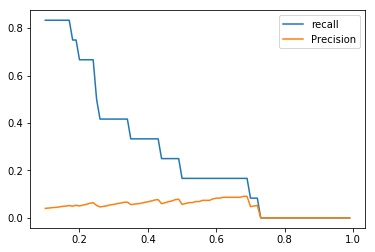

In [40]:
threshold=[]
recall=[]
precision=[]
for t in np.arange(0.1,1,0.01):
    threshold.append(t)
    pred_lr_bio=np.where(clf_bio.predict_proba(xtest_bio)[:,1] > t, 1, 0)
    recall.append(recall_score(ytest_bio, pred_lr_bio))
    precision.append(precision_score(ytest_bio, pred_lr_bio))  
    
    
plt.plot(threshold,recall,label='recall')
plt.plot(threshold,precision,label='Precision')
plt.legend(loc='best')

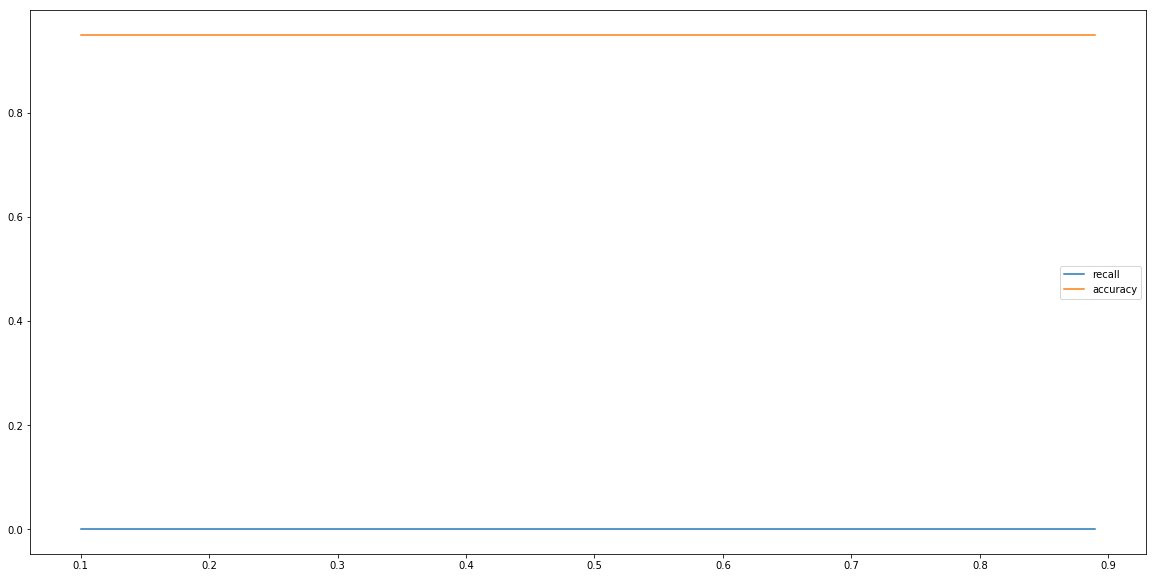

In [41]:
pred_prob=clf_hin.predict_proba(xtest_bio)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest_bio, pred_lr_bio))
    accuracy.append(metrics.accuracy_score(ytest_bio, pred_lr_bio))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

# Schiller

In [42]:
clf_sch = LogisticRegression()
clf_sch.fit(xtrain_sch,ytrain_sch)
THRESHOLD = 0.35
pred_lr_sch = np.where((clf_sch.predict_proba(xtest_sch)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_sch, pred_lr_sch)*100, recall_score(ytest_sch, pred_lr_sch)*100,
                   precision_score(ytest_sch, pred_lr_sch)*100, roc_auc_score(ytest_sch, pred_lr_sch)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,74.806202
recall,41.176471
precision,11.290323
roc_auc_score,59.177447


In [43]:
print(classification_report(ytest_sch, pred_lr_sch))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       241
           1       0.11      0.41      0.18        17

   micro avg       0.75      0.75      0.75       258
   macro avg       0.53      0.59      0.51       258
weighted avg       0.89      0.75      0.81       258



In [44]:
confusion_matrix(ytest_sch, pred_lr_sch)

array([[186,  55],
       [ 10,   7]], dtype=int64)

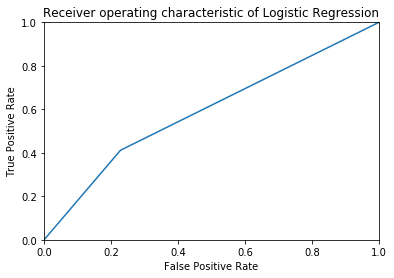

The AUC value for Logistic Regression(SMOTE) is: 0.591774469123749


In [45]:
fpr, tpr, thresholds = roc_curve(ytest_sch, pred_lr_sch)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression(SMOTE) is:',roc_auc)

Changing Threshold

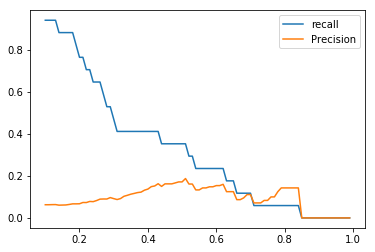

In [46]:
threshold=[]
recall=[]
precision=[]
for t in np.arange(0.1,1,0.01):
    threshold.append(t)
    pred_lr_sch=np.where(clf_sch.predict_proba(xtest_sch)[:,1] > t, 1, 0)
    recall.append(recall_score(ytest_sch, pred_lr_sch))
    precision.append(precision_score(ytest_sch, pred_lr_sch))  
    
    
plt.plot(threshold,recall,label='recall')
plt.plot(threshold,precision,label='Precision')
plt.legend(loc='best')

# Citology

In [47]:
clf_cit = LogisticRegression()
clf_cit.fit(xtrain_cit,ytrain_cit)
THRESHOLD = 0.35
pred_lr_cit = np.where((clf_cit.predict_proba(xtest_cit)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_cit, pred_lr_cit)*100, recall_score(ytest_cit, pred_lr_cit)*100,
                   precision_score(ytest_cit, pred_lr_cit)*100, roc_auc_score(ytest_cit, pred_lr_cit)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,75.968992
recall,35.294118
precision,10.526316
roc_auc_score,57.066146


In [48]:
print(classification_report(ytest_cit, pred_lr_cit))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       241
           1       0.11      0.35      0.16        17

   micro avg       0.76      0.76      0.76       258
   macro avg       0.53      0.57      0.51       258
weighted avg       0.89      0.76      0.81       258



In [49]:
confusion_matrix(ytest_cit, pred_lr_cit)

array([[190,  51],
       [ 11,   6]], dtype=int64)

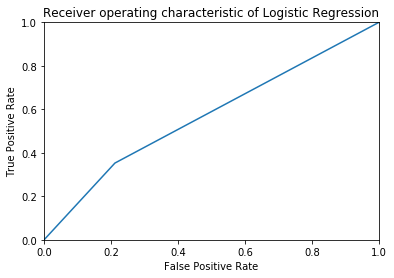

The AUC value for Logistic Regression(SMOTE) is: 0.5706614596045887


In [50]:
fpr, tpr, thresholds = roc_curve(ytest_cit, pred_lr_cit)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression(SMOTE) is:',roc_auc)

# Changing Threshold

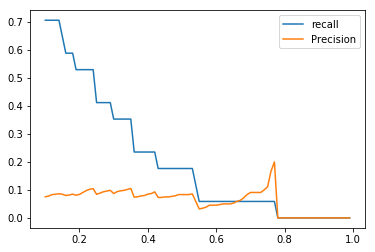

In [51]:
threshold=[]
recall=[]
precision=[]
for t in np.arange(0.1,1,0.01):
    threshold.append(t)
    pred_lr_cit=np.where(clf_cit.predict_proba(xtest_cit)[:,1] > t, 1, 0)
    recall.append(recall_score(ytest_cit, pred_lr_cit))
    precision.append(precision_score(ytest_cit, pred_lr_cit))  
    
    
plt.plot(threshold,recall,label='recall')
plt.plot(threshold,precision,label='Precision')
plt.legend(loc='best')

In [52]:
clf_cit = LogisticRegression()
clf_cit.fit(xtrain_cit,ytrain_cit)
THRESHOLD = 0.37
pred_lr_cit = np.where((clf_cit.predict_proba(xtest_cit)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_cit, pred_lr_cit)*100, recall_score(ytest_cit, pred_lr_cit)*100,
                   precision_score(ytest_cit, pred_lr_cit)*100, roc_auc_score(ytest_cit, pred_lr_cit)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,75.968992
recall,23.529412
precision,7.547170
roc_auc_score,51.598731


# Random Forest

# Hinselmann

In [53]:
rf_hin = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf_hin.fit(xtrain_hin,ytrain_hin)
THRESHOLD = 0.35
pred_rf_hin = np.where((rf_hin.predict_proba(xtest_hin)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_hin, pred_rf_hin)*100, recall_score(ytest_hin, pred_rf_hin)*100,
                   precision_score(ytest_hin, pred_rf_hin)*100, roc_auc_score(ytest_hin, pred_rf_hin)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,92.248062
recall,0.000000
precision,0.000000
roc_auc_score,47.791165


In [54]:
print(classification_report(ytest_hin, pred_rf_hin))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       249
           1       0.00      0.00      0.00         9

   micro avg       0.92      0.92      0.92       258
   macro avg       0.48      0.48      0.48       258
weighted avg       0.93      0.92      0.93       258



In [55]:
confusion_matrix(ytest_hin, pred_rf_hin)

array([[238,  11],
       [  9,   0]], dtype=int64)

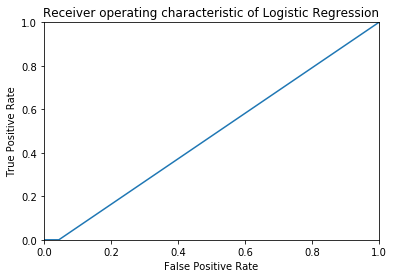

The AUC value for Logistic Regression(SMOTE) is: 0.4779116465863454


In [56]:
fpr, tpr, thresholds = roc_curve(ytest_hin, pred_rf_hin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression(SMOTE) is:',roc_auc)

In [57]:
feat_hin=pd.DataFrame(rf_hin.feature_importances_, columns = ["Imp"], index = xtrain_hin.columns)
feat_hin.sort_values(by='Imp',inplace=True,ascending=False)
print(feat_hin)

                                         Imp
Num of pregnancies                  0.164687
Hormonal Contraceptives (years)     0.141803
First sexual intercourse            0.108859
Hormonal Contraceptives             0.091531
Age                                 0.090726
Dx:Cancer                           0.048452
Number of sexual partners           0.046580
IUD                                 0.045636
Dx:HPV                              0.043722
IUD (years)                         0.035574
Smokes (years)                      0.025502
Smokes                              0.025268
Smokes (packs/year)                 0.024169
STDs:HIV                            0.023060
STDs (number)                       0.016227
STDs:condylomatosis                 0.013942
STDs: Time since last diagnosis     0.013925
STDs: Time since first diagnosis    0.013669
STDs:vulvo-perineal condylomatosis  0.011117
STDs                                0.005988
STDs: Number of diagnosis           0.005192
Dx        

                                         Imp
Age                                 0.090726
Number of sexual partners           0.046580
First sexual intercourse            0.108859
Num of pregnancies                  0.164687
Smokes                              0.025268
Smokes (years)                      0.025502
Smokes (packs/year)                 0.024169
Hormonal Contraceptives             0.091531
Hormonal Contraceptives (years)     0.141803
IUD                                 0.045636
IUD (years)                         0.035574
STDs                                0.005988
STDs (number)                       0.016227
STDs:condylomatosis                 0.013942
STDs:cervical condylomatosis        0.000000
STDs:vaginal condylomatosis         0.000066
STDs:vulvo-perineal condylomatosis  0.011117
STDs:syphilis                       0.000610
STDs:pelvic inflammatory disease    0.000005
STDs:genital herpes                 0.000062
STDs:molluscum contagiosum          0.000030
STDs:AIDS 

Text(0, 0.5, 'Features')

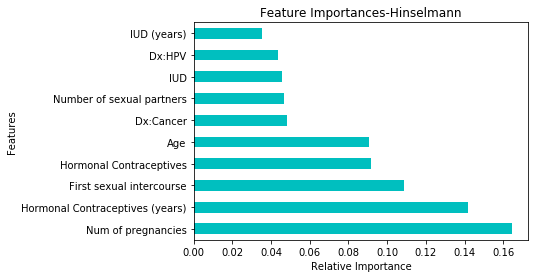

In [58]:
print (pd.DataFrame(rf_hin.feature_importances_, columns = ["Imp"], index = xtrain_hin.columns))
feat_importances = pd.Series(rf_hin.feature_importances_, index=xtrain_hin.columns)
feat_importances.nlargest(10).plot(kind='barh',color='c')
plt.title('Feature Importances-Hinselmann')
plt.xlabel('Relative Importance')
plt.ylabel('Features')

In [59]:
print (pd.DataFrame(rf_hin.feature_importances_, columns = ["Imp"], index = xtrain_hin.columns))

                                         Imp
Age                                 0.090726
Number of sexual partners           0.046580
First sexual intercourse            0.108859
Num of pregnancies                  0.164687
Smokes                              0.025268
Smokes (years)                      0.025502
Smokes (packs/year)                 0.024169
Hormonal Contraceptives             0.091531
Hormonal Contraceptives (years)     0.141803
IUD                                 0.045636
IUD (years)                         0.035574
STDs                                0.005988
STDs (number)                       0.016227
STDs:condylomatosis                 0.013942
STDs:cervical condylomatosis        0.000000
STDs:vaginal condylomatosis         0.000066
STDs:vulvo-perineal condylomatosis  0.011117
STDs:syphilis                       0.000610
STDs:pelvic inflammatory disease    0.000005
STDs:genital herpes                 0.000062
STDs:molluscum contagiosum          0.000030
STDs:AIDS 

# Biopsy

In [60]:
rf_bio = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf_bio.fit(xtrain_bio,ytrain_bio)
THRESHOLD = 0.35
pred_rf_bio = np.where((rf_bio.predict_proba(xtest_bio)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_bio, pred_rf_bio)*100, recall_score(ytest_bio, pred_rf_bio)*100,
                   precision_score(ytest_bio, pred_rf_bio)*100, roc_auc_score(ytest_bio, pred_rf_bio)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,92.635659
recall,0.000000
precision,0.000000
roc_auc_score,48.577236


In [61]:
print(classification_report(ytest_bio, pred_rf_bio))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       246
           1       0.00      0.00      0.00        12

   micro avg       0.93      0.93      0.93       258
   macro avg       0.48      0.49      0.48       258
weighted avg       0.91      0.93      0.92       258



In [62]:
confusion_matrix(ytest_bio, pred_rf_bio)

array([[239,   7],
       [ 12,   0]], dtype=int64)

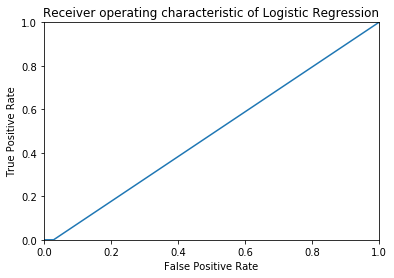

The AUC value for Logistic Regression(SMOTE) is: 0.48577235772357724


In [63]:
fpr, tpr, thresholds = roc_curve(ytest_bio, pred_rf_bio)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression(SMOTE) is:',roc_auc)

# Citology

In [64]:
rf_cit = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf_cit.fit(xtrain_cit,ytrain_cit)
THRESHOLD = 0.35
pred_rf_cit = np.where((rf_cit.predict_proba(xtest_cit)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_cit, pred_rf_cit)*100, recall_score(ytest_cit, pred_rf_cit)*100,
                   precision_score(ytest_cit, pred_rf_cit)*100, roc_auc_score(ytest_cit, pred_rf_cit)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,91.860465
recall,5.882353
precision,16.666667
roc_auc_score,51.903832


In [65]:
print(classification_report(ytest_cit, pred_rf_cit))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       241
           1       0.17      0.06      0.09        17

   micro avg       0.92      0.92      0.92       258
   macro avg       0.55      0.52      0.52       258
weighted avg       0.89      0.92      0.90       258



In [66]:
confusion_matrix(ytest_cit, pred_rf_cit)

array([[236,   5],
       [ 16,   1]], dtype=int64)

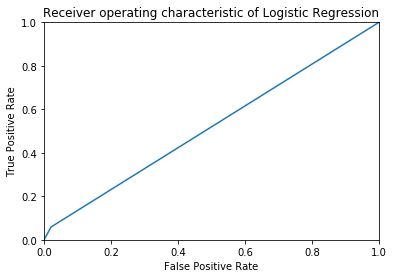

The AUC value for Logistic Regression(SMOTE) is: 0.5190383207224798


In [67]:
fpr, tpr, thresholds = roc_curve(ytest_cit, pred_rf_cit)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression(SMOTE) is:',roc_auc)

# Schiller

In [68]:
rf_sch = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf_sch.fit(xtrain_sch,ytrain_sch)
THRESHOLD = 0.35
pred_rf_sch = np.where((rf_sch.predict_proba(xtest_sch)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_sch, pred_rf_sch)*100, recall_score(ytest_sch, pred_rf_sch)*100,
                   precision_score(ytest_sch, pred_rf_sch)*100, roc_auc_score(ytest_sch, pred_rf_sch)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,89.147287
recall,23.529412
precision,21.052632
roc_auc_score,58.652673


In [69]:
print(classification_report(ytest_sch, pred_rf_sch))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       241
           1       0.21      0.24      0.22        17

   micro avg       0.89      0.89      0.89       258
   macro avg       0.58      0.59      0.58       258
weighted avg       0.90      0.89      0.89       258



In [70]:
confusion_matrix(ytest_sch, pred_rf_sch)

array([[226,  15],
       [ 13,   4]], dtype=int64)

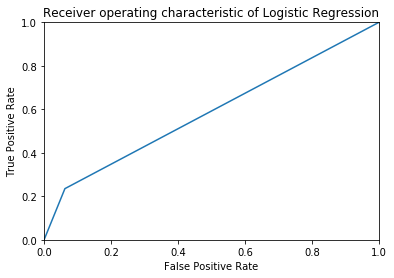

The AUC value for Logistic Regression(SMOTE) is: 0.586526726873322


In [71]:
fpr, tpr, thresholds = roc_curve(ytest_sch, pred_rf_sch)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression(SMOTE) is:',roc_auc)